<a href="https://colab.research.google.com/github/anderson02aa/Pos_de_IA_na_UFV-2024/blob/main/ELT574_11850_3_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<CENTER><FONT SIZE=6![imagem_2024-06-22_020239309.png](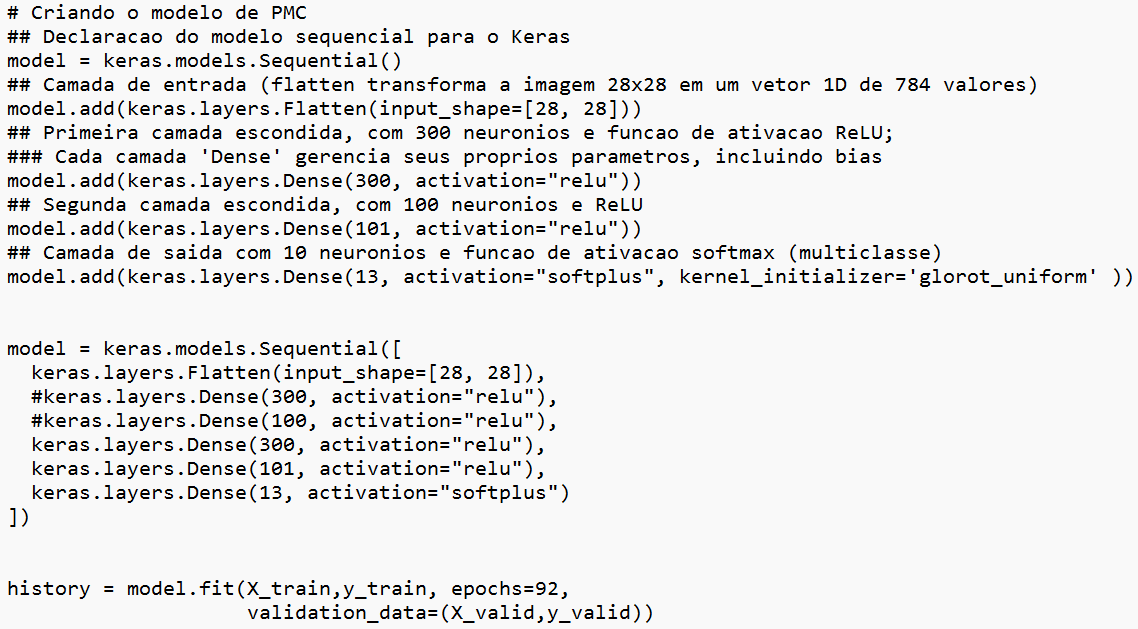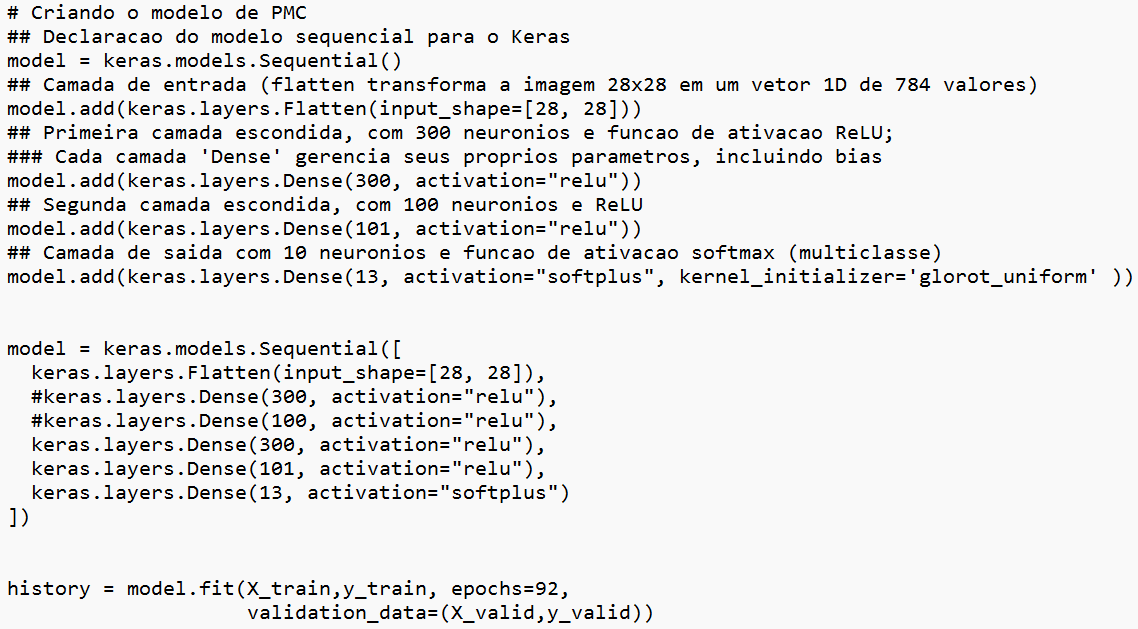) color=#FF0000> **ELT574 - Aprendizado de Máquinas**</FONT></CENTER>
<BR>
<CENTER><FONT SIZE=4>**Curso de Especialização em Inteligência Artificial e Computacional**</FONT></CENTER>




<br><center><b>
<CENTER><font size=4>[Atividade 3-Pós_UFV] - ELT 574-APRENDIZADO_DE_MaQUINA
</font></CENTER></b></center></H1>
<p>
*   Nome: Anderson Alves de Albuquerque<br>
*   Data: junho de 2024<br>
*   Professor(es): Rodolpho Neves.<br>
*   Este trabalho foi realizado para compor a avaliação (nota) na disciplina APRENDIZADO_DE_MaQUINA da Pós-graduação em IA.
</p><br>



<p><h9>OBS1: a URL do <i>notebook</i> desse projeto no Colab é <a href="https://colab.research.google.com/drive/1yI9Y-RmFgEVjXFgO6x9t8b_cbhiLk_6j?usp=sharing">https://colab.research.google.com/drive/1yI9Y-RmFgEVjXFgO6x9t8b_cbhiLk_6j?usp=sharing</a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a URL do <i>notebook</i> desse projeto no GitHub é <a href="https://colab.research.google.com/drive/1yI9Y-RmFgEVjXFgO6x9t8b_cbhiLk_6j?usp=sharing">https://colab.research.google.com/drive/1yI9Y-RmFgEVjXFgO6x9t8b_cbhiLk_6j?usp=sharing</a></h9></p>

<p><h2><b><font color=#FF0000>OBS2: o desenvolvimento final para responder as perguntas se concentrou ......................
</font>
</b></h2></p>

#<b>0. Informações iniciais:</b>

<p align="justify">&emsp;Esse <i>dataset</i> foi ..... .
</p>


<p><b>Enunciado desta atividade 3:</b></p>
<p align="justify">&emsp;Crie um Notebook no Google Colab com o nome [ELT574 <Matrícula> Atividade 3], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 12700-0 Atividade 3). Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.
</p>

<p align="justify">&emsp;Utilize o notebook disponibilizado para o problema de classificação multiclasse Fashion MNIST e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 90% de acurácia nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.
</p>

<p align="justify">&emsp;Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.
</p>

Preparação do ambiente de programação e importação das principais bibliotecas.

In [789]:
## Instalando Pacotes
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install numpy

In [790]:
#Importando as bibliotecas para análise do problema e configurando o notebook
## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
print('Setup completo!')

Setup completo!


#<b>1. Semana 3 - Redes Neurais Artificiais na Aula 03: Redes perceptron multicamadas (classificação)</b>

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [791]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [792]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [793]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [794]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [795]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [796]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





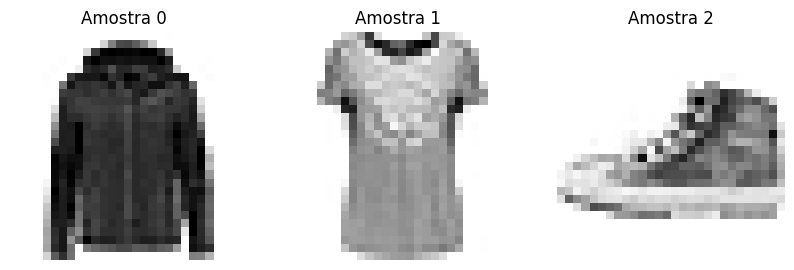

In [797]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [798]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [799]:
class_names[y_train[0]]

'Coat'

Algumas das imagens do dataset de treinamento:

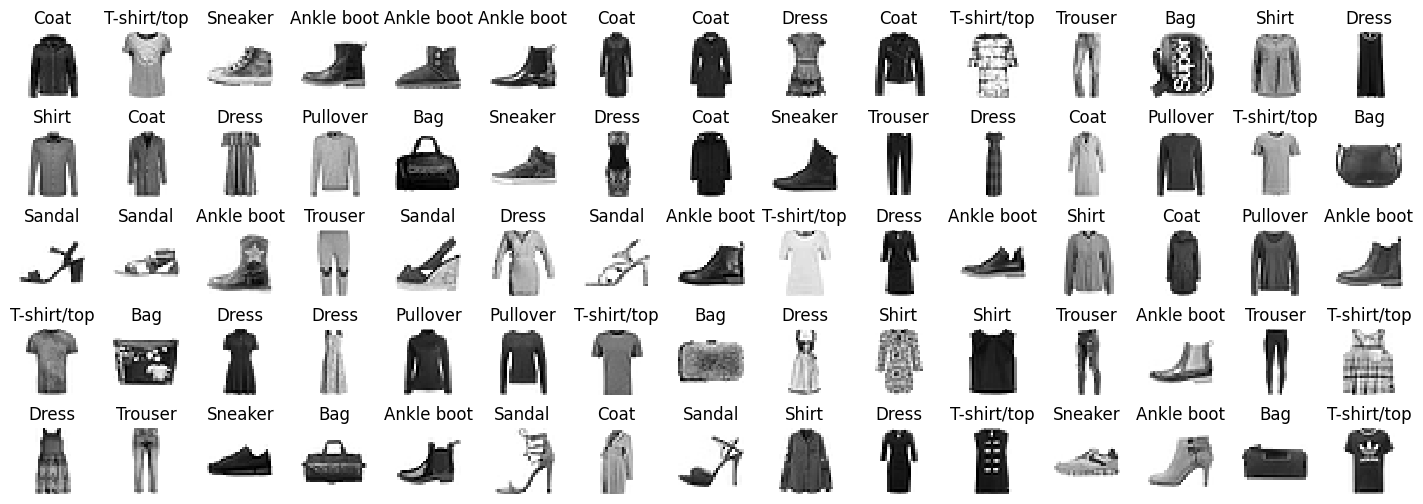

In [800]:
n_rows = 5
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [801]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
#model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(315, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
#model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(115, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
#model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dense(35, activation="softplus", kernel_initializer='glorot_uniform' ))

Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [802]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  #keras.layers.Dense(300, activation="relu"),
  #keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(315, activation="relu"),
  keras.layers.Dense(115, activation="relu"),
  keras.layers.Dense(20, activation="softplus")
])
##Funções de Ativação:
#"linear": Ativação linear, sem transformação.
#"sigmoid": Função sigmoide, que mapeia valores para o intervalo [0, 1].
#"tanh": Função tangente hiperbólica, que mapeia valores para o intervalo [-1, 1].
#"elu": Unidade de Ativação Exponencial Linear, uma variante do ReLU que evita o problema do "dying ReLU".
#"selu": Unidade de Ativação Exponencial Linear Escalonada, uma versão escalonada do ELU.

##Funções de Ativação Especializadas:
#"softplus": Uma função suave que aproxima a função ReLU.
#"softsign": Uma função de ativação não linear que produz saídas no intervalo [-1, 1].
#"relu": A função de ativação ReLU padrão.
#"leaky_relu": Uma variante do ReLU que evita o problema do "dying ReLU".
#"prelu": ReLU Paramétrico, uma versão parametrizada do ReLU.


A estrutura do modelo pode ser verificada por:

In [803]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_56 (Flatten)        (None, 784)               0         
                                                                 
 dense_174 (Dense)           (None, 315)               247275    
                                                                 
 dense_175 (Dense)           (None, 115)               36340     
                                                                 
 dense_176 (Dense)           (None, 20)                2320      
                                                                 
Total params: 285935 (1.09 MB)
Trainable params: 285935 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


E as camadas do modelo por:

In [804]:
model.layers

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [805]:
hidden1 = model.layers[1]
hidden1

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [806]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01402386,  0.0372232 , -0.06383607, ...,  0.07027162,
         0.00651028, -0.06058637],
       [-0.02200259, -0.05721924,  0.0516727 , ...,  0.05217724,
        -0.03236078, -0.00667318],
       [-0.02370593, -0.03704226,  0.05624215, ..., -0.05722148,
         0.03026961, -0.05247235],
       ...,
       [-0.06980358,  0.02262805,  0.06432255, ..., -0.00623228,
        -0.07140611, -0.02555592],
       [ 0.01229738,  0.05396537,  0.02712309, ..., -0.02656252,
         0.00556868,  0.05667875],
       [-0.05654664,  0.05422916,  0.04581586, ...,  0.04200882,
        -0.01990314, -0.05509593]], dtype=float32)

In [807]:
weights.shape

(784, 315)

In [808]:
biases.shape

(315,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [809]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [810]:
history = model.fit(X_train,y_train, epochs=91,
                    validation_data=(X_valid,y_valid))

Epoch 1/91
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8895 - accuracy: 0.7154 - val_loss: 0.6223 - val_accuracy: 0.7942
Epoch 2/91
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5309 - accuracy: 0.8185 - val_loss: 0.5991 - val_accuracy: 0.7972
Epoch 3/91
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4691 - accuracy: 0.8383 - val_loss: 0.4278 - val_accuracy: 0.8566
Epoch 4/91
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4356 - accuracy: 0.8486 - val_loss: 0.4280 - val_accuracy: 0.8494
Epoch 5/91
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4127 - accuracy: 0.8552 - val_loss: 0.4282 - val_accuracy: 0.8550
Epoch 6/91
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3949 - accuracy: 0.8621 - val_loss: 0.3983 - val_accuracy: 0.8664
Epoch 7/91
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3790 - accuracy: 0.8668 - val_loss: 0.3933 - val_ac

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

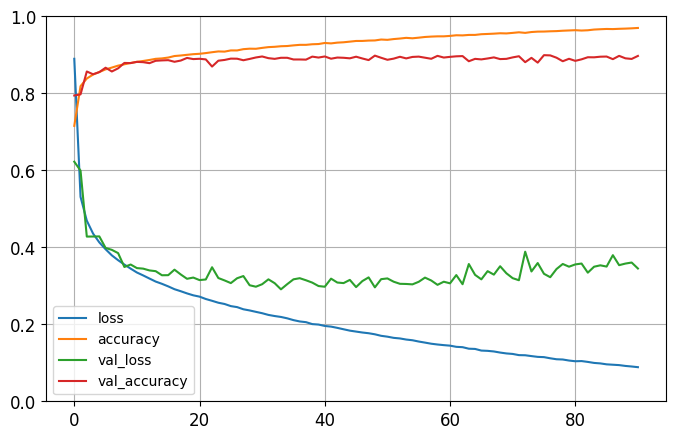

In [811]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [812]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.8935


[0.38055917620658875, 0.8934999704360962]

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [813]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 79ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.81, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 5.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [814]:
list(y_test[:3])

[9, 2, 1]

In [815]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [816]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [817]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

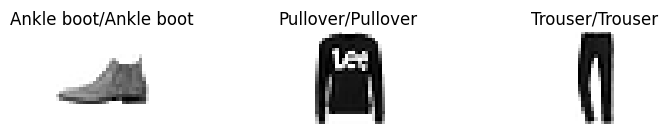

In [818]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

=========

#<b><font size=5 color=#870000>2. Resultado:</font></b>

<p align="justify">&emsp;<font size=3 color=#870000><b>
O máximo que foi obtido na acuária foi na casa de 0.8931. O último teste foi obtido 0,8935, mas eu lembro de ter obtido valores um pouco maiores, porém menores que 0,90.</font>
</p>
<p align="justify">&emsp;<font size=3 color=#870000><b>Diversos testes foram realizados como aumentar as épocas, na maioria das vezes as épocas foram trabalhadas até 120. Porém, em poucos momentos foram testadas épocas na casa de 1020.</font>
</p>
<p align="justify">&emsp;<font size=3 color=#870000><b>Como funções de ativação foram testadas com a configuração activation, hiperparâmetro, como: linear, sigmoid, tanh, elu e selu. Porém, não adiantou, algumas dessas funções de ativação resultaram em valores horríveis, ou seja, menores que 0,5 de acuária.</font>
</p>

<p align="justify">&emsp;<font size=3 color=#870000><b>Ademais, também foram testadas algumas funções de ativação especializada, que teve a configuração do hiperparâmetro activation contendo softplus, softsign, leaky_relu e prelu. O mesmo cenário encontrado antes com as funções de ativação do parágrafo anterior. Todavia, a configuração desse hiperparâmetro activation com softplus se destacou sendo tão boa quanto a configuração com softmax. Contudo, a configuração desse hiperparâmetro com softplux se mostrou um pouco mais sensível, dependendo dos valores, por exmplo: os números maiores ou iguai que 35 não eram bons.</font>
</p>

<p align="justify">&emsp;<font size=3 color=#870000><b>
Um parâmetro que se mostrou manter a maioria dos teste com acuária alta é o "kernel_initializer='glorot_uniform'", tanto no caso da configração de activation com softmax ou softplus.
</font></p>

##<b><font size=5 color=#870000>2.1. Trechos de códigos alterados durante os testes:</font></b>

<p align="justify">&emsp;<font size=3 color=#870000><b>Diante do que foi dito acima neste item 2, para viabilizar os testes, logo abaixo destaco os 3 trechos (blocos) de códigos que foram alterados sistematicamente.</font>
</p>
<br>
|# Criando o modelo de PMC<br>
|    ## Declaracao do modelo sequencial para o Keras<br>
|model = keras.models.Sequential()<br>
|    ## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)<br>
|model.add(keras.layers.Flatten(input_shape=[28, 28]))<br>
|    ## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;<br>
|    ### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias<br>
|model.add(keras.layers.Dense(300, activation="relu"))<br>
|    ## Segunda camada escondida, com 100 neuronios e ReLU<br>
|model.add(keras.layers.Dense(101, activation="relu"))<br>
|    ## Camada de saida com 10 neuronios e <br>
|   funcao de ativacao softmax (multiclasse)<br>
|model.add(keras.layers.Dense(13, activation="softplus", kernel_initializer='glorot_uniform' ))<br>

<br>
|model = keras.models.Sequential([<br>
|  keras.layers.Flatten(input_shape=[28, 28]),<br>
|  #keras.layers.Dense(300, activation="relu"),<br>
|  #keras.layers.Dense(100, activation="relu"),<br>
|  keras.layers.Dense(300, activation="relu"),<br>
|  keras.layers.Dense(101, activation="relu"),<br>
|  keras.layers.Dense(13, activation="softplus")])<br>

<br>
|history = model.fit(X_train,y_train, epochs=92,<br>
|                   validation_data=(X_valid,y_valid))<br>


